---
title: "Lab-10: Assignment"
author: "Brian Kwon"
format: 
    html: 
        embed-resources: true
---

## Problem 1: 

Import the data from Flight Delays into R. Although the data are on all UA and AA flights flown in May and June of 2009, we will assume these represent a sample from a larger population of UA and AA flights flown under similar circumstances. We will consider the ratio of means of the flight delay lengths, $\mu UA/ \mu AA$.



In [19]:
df = read.csv("FlightDelays.csv")
head(df)

,ID,Carrier,FlightNo,Destination,DepartTime,Day,Month,FlightLength,Delay,Delayed30
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,1,UA,403,DEN,4-8am,Fri,May,281,-1,No
2,2,UA,405,DEN,8-Noon,Fri,May,277,102,Yes
3,3,UA,409,DEN,4-8pm,Fri,May,279,4,No
4,4,UA,511,ORD,8-Noon,Fri,May,158,-2,No
5,5,UA,667,ORD,4-8am,Fri,May,143,-3,No
6,6,UA,669,ORD,4-8am,Fri,May,150,0,No


(a)  Perform some exploratory data analysis(EDA) on flight delay lengths for each of UA and AA flights(look at some plots). Comment on your results.



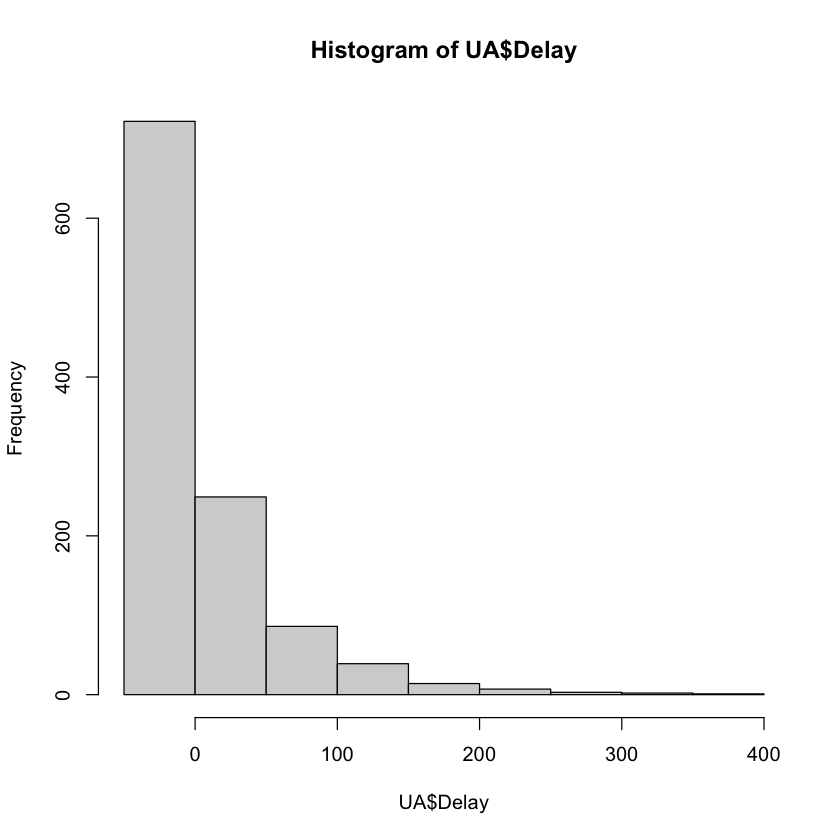

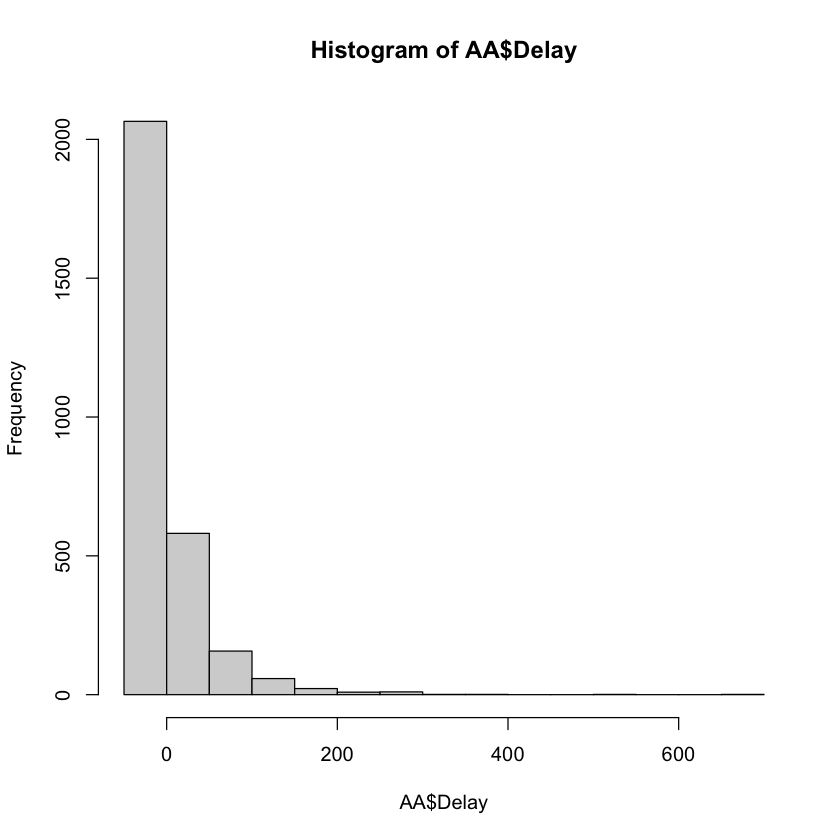

In [20]:
UA = df[df$Carrier == "UA",]
AA = df[df$Carrier == "AA",]
hist(UA$Delay)
hist(AA$Delay)

In [21]:
summary(UA$Delay)
summary(AA$Delay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -17.00   -5.00   -1.00   15.98   12.50  377.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -19.0    -6.0    -3.0    10.1     4.0   693.0 

Flight delay lengths for both UA and AA is skewed to the right. The mean flight delay length of UA and AA is 15.98 and 10.1 respectively.

(b) Bootstrap the mean of flight delay lengths for each airline separately and plot and describe the distribution.



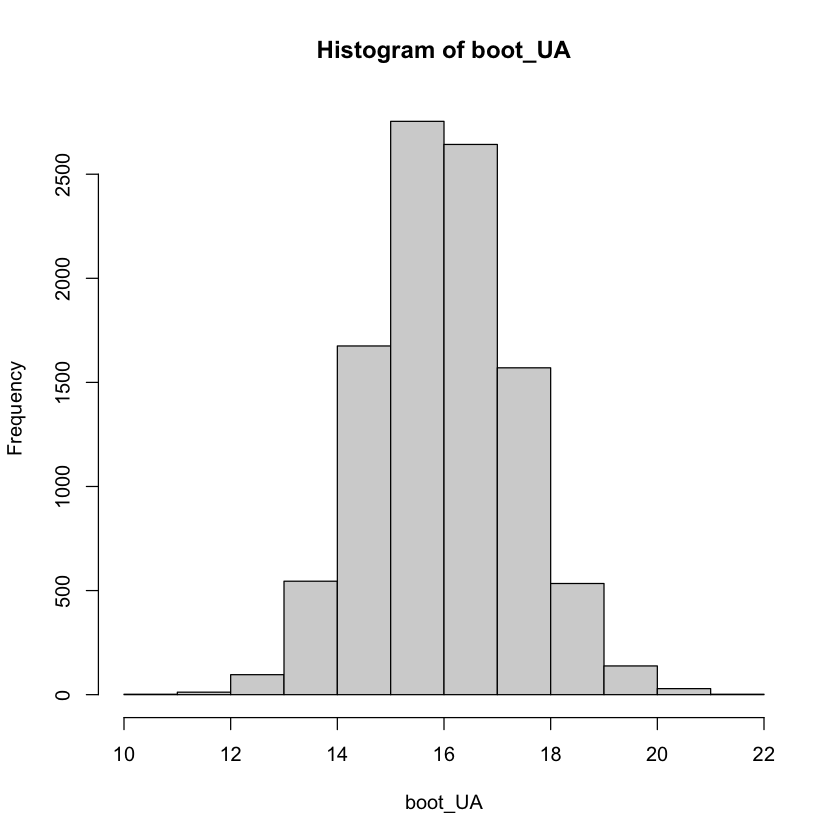

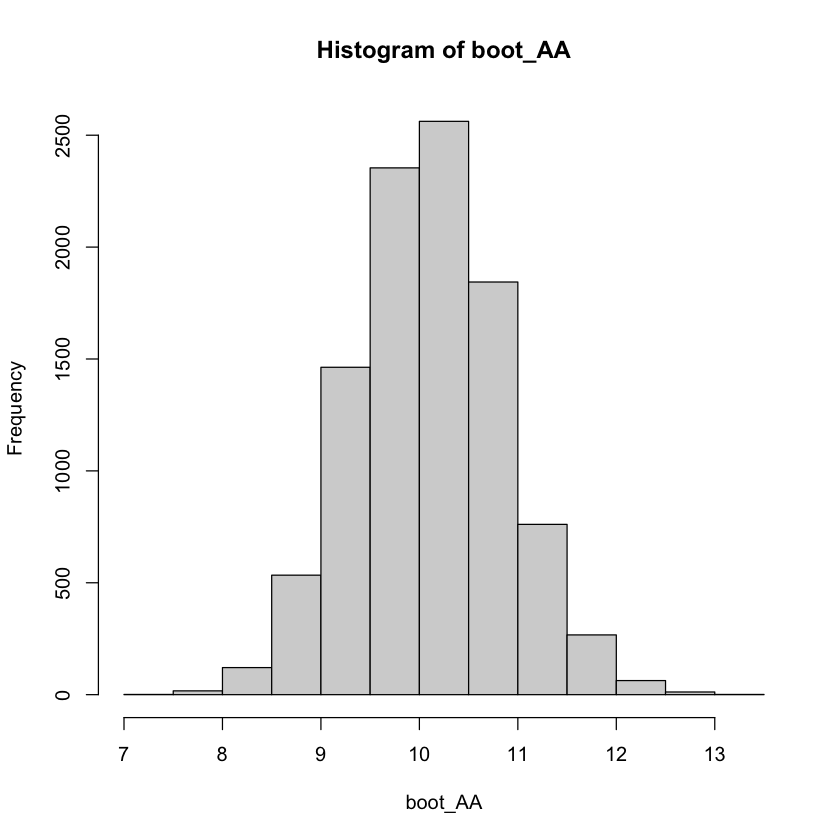

In [22]:
iter = 10000
boot_UA = numeric(length(UA$Delay))
boot_AA = numeric(length(AA$Delay))
for(i in 1:iter){
    boot_UA[i] = mean(sample(UA$Delay,length(UA$Delay),replace=TRUE))
    boot_AA[i] = mean(sample(AA$Delay,length(AA$Delay),replace=TRUE))
}
hist(boot_UA)
hist(boot_AA)


In [23]:
mean(boot_UA)
mean(boot_AA)


[1] 15.99805

[1] 10.10131

Having 10000 bootstrap samples, the distribution of the bootstrap flight delay length follows the normal distribution. The means of bootstrap sample of both UA and AA are very close to actual means of both.

(c) Bootstrap the ratio of means. Provide plots of the bootstrap distribution and describe the distribution.



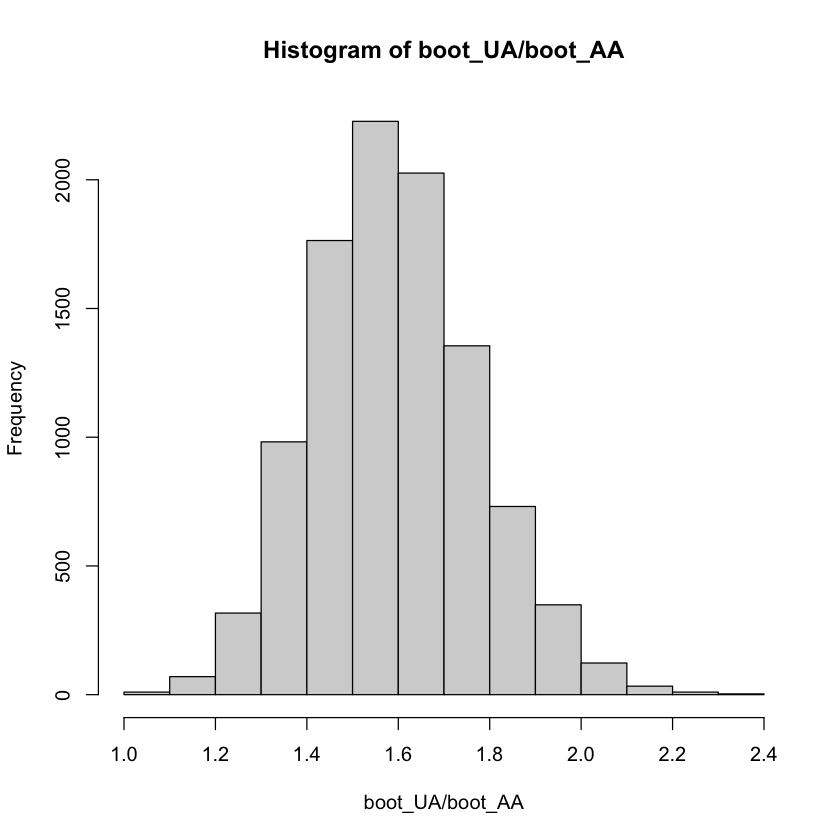

In [24]:
hist(boot_UA/boot_AA)

The distribution of the bootstrap sample of the ratio of means seems very close to the normal distribution.

(d) Find the 95% bootstrap percentile interval for the ratio of means. Interpret this interval.



In [25]:
quantile(boot_UA/boot_AA, c(0.025, 0.975))

2.5%    97.5% 
1.265607 1.964654

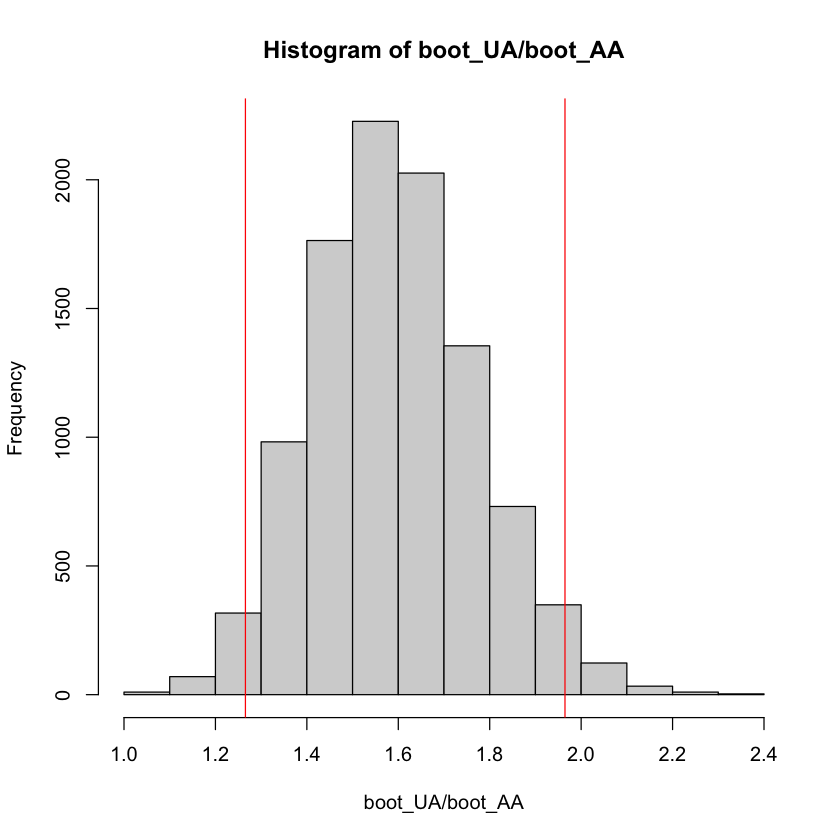

In [32]:
hist(boot_UA/boot_AA)
abline(v = quantile(boot_UA/boot_AA, c(0.025, 0.975)), col = "red")

We are 95% confident that the true ratio of means between UA and AA is between 1.266 and 1.965.

(e) What is the bootstrap estimate of the bias for the mean ratio?




In [33]:
mean(boot_UA/boot_AA) - mean(UA$Delay)/mean(AA$Delay)

[1] 0.009464808

## Problem 2: Hypothesis testing using bootstrap approach.
(Chihara2011)

Import the data set Titanic.csv which contains survival data (0 = death, 1 = survival) and ages of 658 passengers of the Titanic which sank on April 15, 1912 (the day when Americans had to file income tax returns for the first time). Examine the null hypothesis that the mean ages of survivors and of victims are the same against the alternative that these mean ages are different, using a bootstrap approach.

In [34]:
Titanic = read.csv("Titanic.csv",stringsAsFactors=FALSE)
head(Titanic)

,ID,Survived,Age
,<int>,<int>,<dbl>
1,1,1,0.92
2,2,0,30.00
3,3,1,48.00
4,4,0,39.00
5,5,0,71.00
6,6,0,47.00


Let's make a hypothesis. Are two population means different?

Null Hypothesis: Mean ages of survivors and of victims are the same. (That means that there is no difference between the two population means)

Let's use the bootstrap approach.

a. First let's seperate the two samples "survivors(=1)" and "victims(=0)".




In [35]:
survivors = Titanic[Titanic$Survived == 1,]
victims = Titanic[Titanic$Survived == 0,]

b. Make many bootstrap samples(100000) of difference of sample means. 




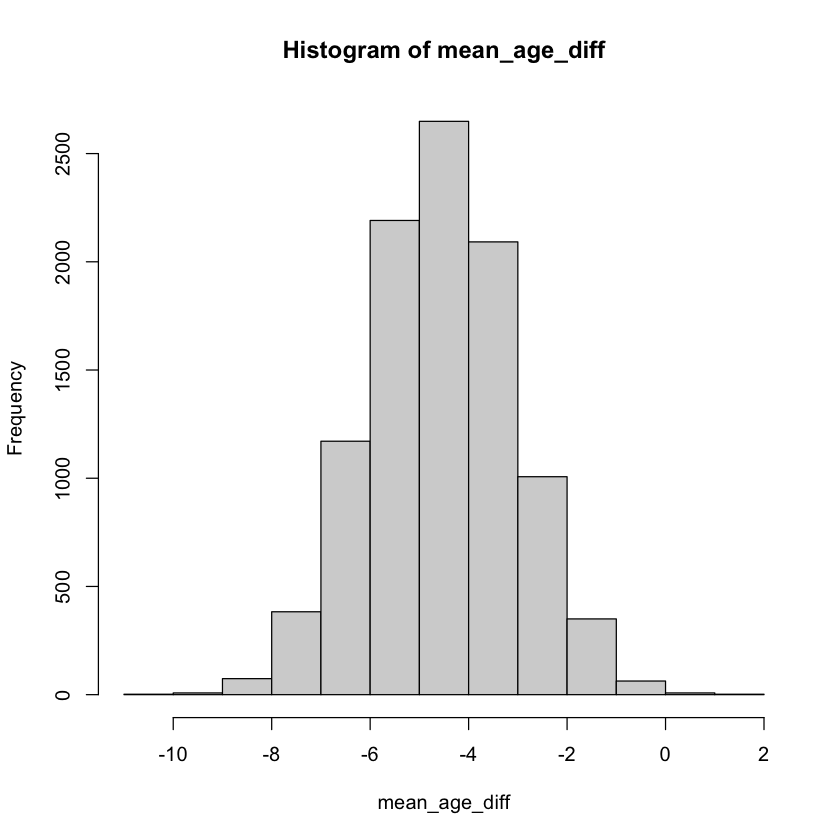

In [36]:
n = 10000
mean_age_diff = numeric(n) 
for (i in 1:n){
    surv_age = sample(survivors$Age, length(survivors$Age), replace = TRUE) 
    vict_age = sample(victims$Age, length(victims$Age), replace = TRUE) 
    mean_age_diff[i] = mean(surv_age) - mean(vict_age)
}
hist(mean_age_diff)

In [37]:
mean(mean_age_diff)

[1] -4.556074

c. Make a 90% percentile  bootstrap confidence interval for the difference estimate. Using this CI, conclude on your hypothesis. 

Null Hypothesis: Mean ages of survivors and of victims are the same. (That means that there is no difference between the two population means)



In [40]:
quantile(mean_age_diff, c(0.05, 0.95))

5%       95% 
-6.950923 -2.126195

We are rejecting null hypothesis because the bootstrp confidence interval doesn't contain the zero, which means there is a difference between ages of survivors and victims.

d. Make a 95% percentile bootstrap confidence interval for the difference estimate and using this CI, conclude on your hypothesis. 

Null Hypothesis: Mean ages of survivors and of victims are the same. (That means that there is no difference between the two population means)



In [41]:
quantile(mean_age_diff, c(0.025, 0.975))

2.5%     97.5% 
-7.427571 -1.674804

Similart, we are rejecting null hypothesis because the bootstrp confidence interval doesn't contain the zero, which means there is a difference between ages of survivors and victims.

## Problem 3 (Optional)

`Optional`: Don't need to submit

Load the Bangladesh data. We made inference about Arsenic in water in the Lab 9. Let's make inference about Cobalt.

```
bdesh <- read.csv("Bangladesh.csv")
head(bdesh)
```

a. Plot the boxplot of Cobalt. What's look wrong? Do you think a transformation can explain the data better?


b. Make a log transformation of the data (Cobalt) and plot the boxplot. What do you see differently? Comment.


c. Are there an missing values? If so, remove the missing values and draw bootstrap samples(10000) of sample mean. (remeber we are still using the log transformation)


d. What is the bias?


e. Find the standard error of the bootstrap estimate. 

Also, calculate the estimate(using the bootstrap sample) of mean squared error(MSE) =var(X)+ (bias)^2

Comment on your results.

f. Make a 95% Percentile Bootstrap CI for mean of log transformed(log10) Cobalt data.  Comment on your results.

g. Repeat the bootstrap sampling process to estimate the median of the actual data(Cobalt- no transformation). 

h. Find the bias and the standard error of the bootstrap estimate. Comment on your results. 
